# RIIID AIED CHALLENGE part 1 (EDA) 

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
lectures = pd.read_csv("D:\ds\mipt\lectures.csv")
questions = pd.read_csv("D:\ds\mipt\questions.csv")

In [18]:
dtypes = {
    'row_id': 'int32',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
    'task_container_id': 'int16',
    'user_answer': 'int8',
    'answered_correctly': 'int8',
    'prior_question_elapsed_time': 'float32',
    'prior_question_had_explanation': 'boolean'
}

train = pd.read_csv('D:\\ds\\mipt\\train.csv', dtype=dtypes)

In [4]:
pd.set_option('display.max_columns', None)

## Предобработка

In [10]:
def camel_to_snake(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

def prep(dataframe):
    dataframe = dataframe.drop_duplicates().reset_index(drop=True)
    dataframe.columns = [camel_to_snake(col) for col in dataframe.columns]
    dataframe.columns = dataframe.columns.str.replace(' ', '_')
    return dataframe

def get_info(dataframe):
    display(dataframe.head(5))
    print('*'*50)
    dataframe.info()
    print('*'*50)
    print(f"Явных дубликатов: {dataframe.duplicated().sum()}")
    print('*'*39)
    print('Пропусков в колонках:')
    missing_counts = dataframe.isna().sum()
    percentage_missing = (missing_counts / dataframe.shape[0]) * 100
    print(pd.concat([missing_counts, percentage_missing.round(1)], 
                    axis=1, keys=['Количество', 'Доля, %']))

def get_uniques(dataframe):
    columns = dataframe.columns
    uniques = [dataframe[col].dropna().unique().tolist() for col in columns]
    data_types = [dataframe[col].dtype for col in columns]
    result_df = pd.DataFrame(
        {'Столбцы': columns,
         'Уникальные значения': uniques, 
         'Тип данных': data_types})
    return result_df

In [6]:
get_info(lectures)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB
**************************************************
Явных дубликатов: 0
***************************************
Пропусков в колонках:
            Количество  Доля, %
lecture_id           0      0.0
tag                  0      0.0
part                 0      0.0
type_of              0      0.0


In [7]:
get_info(questions)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB
**************************************************
Явных дубликатов: 0
***************************************
Пропусков в колонках:
                Количество  Доля, %
question_id              0      0.0
bundle_id                0      0.0
correct_answer           0      0.0
part                     0      0.0
tags                     1      0.0


In [8]:
get_info(train)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(2), int64(1), int8(3)
memory usage: 2.7 GB
**************************************************
Явных дубликатов: 0
***************************************
Пропусков в колонках:
                                Количество  Доля, %
row_id          

Исходя из описания датасета, пропуски в столбцах "prior_question_..." связаны с тем, что данный вопрос является первым, соответственно не имеет времени ответа на предыдущий. Столбец row_id не понадобится, откину его.

In [5]:
train = train.drop(columns=['row_id'])

## Визуализация распределений и поиск выбросов

Целевая переменная - answered_correctly.

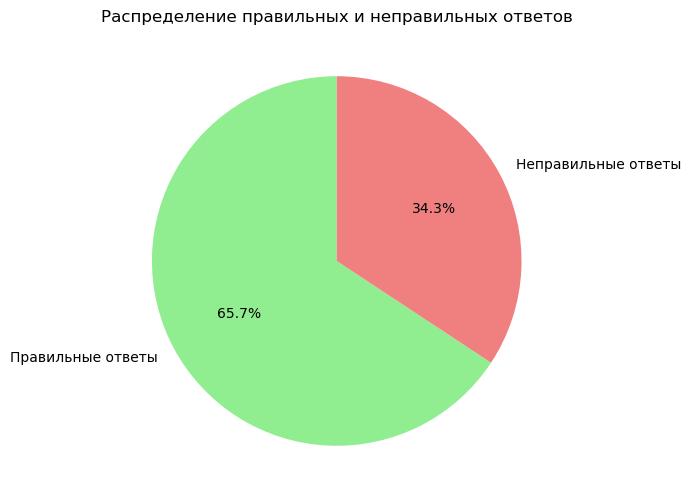

In [31]:
filtered_train = train[train['answered_correctly'].isin([0, 1])]
counts = filtered_train['answered_correctly'].value_counts()

labels = ['Правильные ответы', 'Неправильные ответы']

plt.figure(figsize=(6, 6))
plt.pie(
    counts, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightgreen', 'lightcoral'], 
    labels=labels
)
plt.title('Распределение правильных и неправильных ответов')
plt.show()

Треть ответов неправильные.

prior_question_elapsed_time - время, которое ушло на предыдущий вопрос. Посмотрим на боксплот.

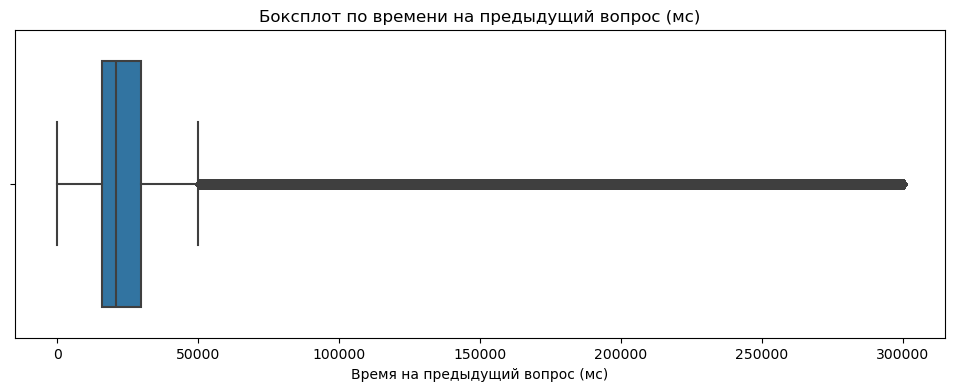

In [10]:
filtered_data = train['prior_question_elapsed_time'].dropna()

plt.figure(figsize=(12, 4))
sns.boxplot(x=filtered_data)
plt.title('Боксплот по времени на предыдущий вопрос (мс)')
plt.xlabel('Время на предыдущий вопрос (мс)')
plt.show()

Все выбросы идут плотно и явных аномалий нет. Посмотрим распределение основной части характеристики.

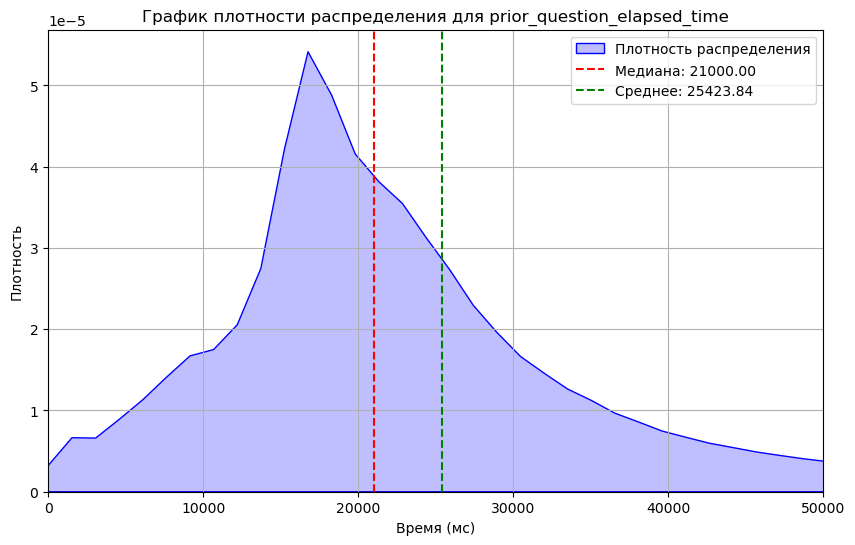

In [11]:
median_value = filtered_data.median()
mean_value = filtered_data.mean()

plt.figure(figsize=(10, 6))
sns.kdeplot(
    filtered_data, 
    color='blue', 
    fill=True, 
    label='Плотность распределения'
)
plt.axvline(
    median_value, 
    color='red', 
    linestyle='--', 
    label=f'Медиана: {median_value:.2f}'
)
plt.axvline(
    mean_value, 
    color='green', 
    linestyle='--', 
    label=f'Среднее: {mean_value:.2f}'
)
plt.title('График плотности распределения для prior_question_elapsed_time')
plt.xlabel('Время (мс)')
plt.ylabel('Плотность')
plt.xlim(0, 50000)  
plt.grid()
plt.legend()
plt.show()

Как видно, медиана и среднее смещены правее относительно купола распределения, ввиду длинного правостороннего хвоста.

prior_question_had_explanation - просматривал ли студент разъяснения. Исходя из документации, это значение распространяется на весь набор вопросов в целом. Посмотрим распределение.

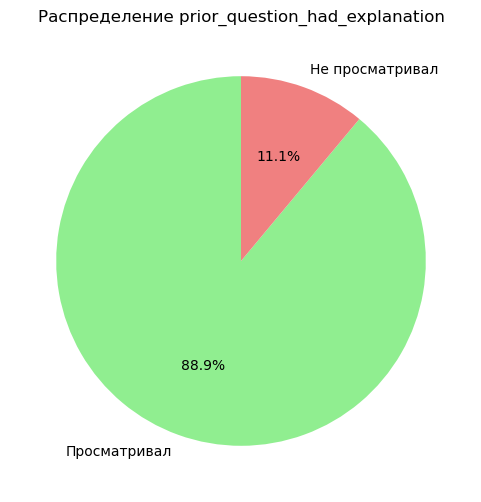

In [32]:
filtered_data = train[train['prior_question_had_explanation'].isin([0, 1])]
counts = filtered_data['prior_question_had_explanation'].value_counts()

labels = ['Просматривал', 'Не просматривал']

plt.figure(figsize=(6, 6))
plt.pie(
    counts, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightgreen', 'lightcoral'], 
    labels=labels
)
plt.title('Распределение prior_question_had_explanation')
plt.show()

Как видно, лишь 11% не пользовались разъяснениями.

content_type_id - тип события: лекция или вопрос.

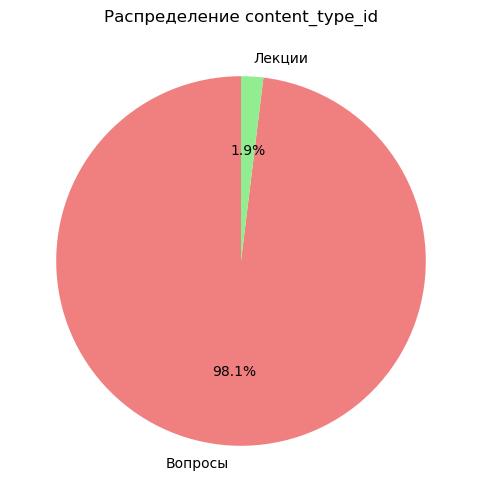

In [9]:
counts = train['content_type_id'].value_counts()

labels = ['Вопросы', 'Лекции']
plt.figure(figsize=(6, 6))
plt.pie(
    counts, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightcoral', 'lightgreen'], 
    labels=labels
)
plt.title('Распределение content_type_id')
plt.show()

Лишь 1,9% событий в датасете - лекционные занятия.

## Поиск зависимостей

timestamp - время в миллисекундах, прошедшее с момента первого взаимодействия пользователя до данного события. На основании этих данных можно посмотреть, как меняется средний балл на протяжении времени. Для этого нормализую значения timestamp и выделю три временных итервала - начало, середина и конец.

,Временное окно,Средний балл
0,Первые 10%,0.636584
1,Средние 50%,0.665427
2,Последние 10%,0.661371


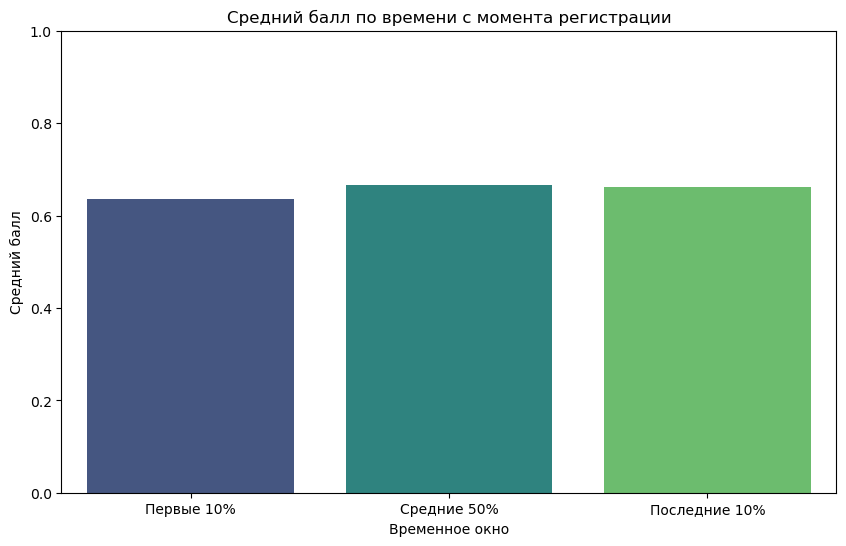

In [19]:
filtered_data = train[train['answered_correctly'].isin([0, 1])].copy()  
filtered_data.loc[:, 'normalized_time'] = filtered_data.groupby(
    'user_id', group_keys=False)['timestamp'].apply(
        lambda x: (x - x.min()) / (x.max() - x.min()))

bins = [0, 0.1, 0.6, 1.0]
labels = ['Первые 10%', 'Средние 50%', 'Последние 10%']

filtered_data.loc[:, 'time_window'] = pd.cut(
    filtered_data['normalized_time'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)
avg_by_time = filtered_data.groupby(
    'time_window')['answered_correctly'].mean().reset_index()
avg_by_time.columns = ['Временное окно', 'Средний балл']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_by_time, 
    x='Временное окно', 
    y='Средний балл', 
    palette='viridis'
)
plt.title('Средний балл по времени с момента регистрации')
plt.ylabel('Средний балл')
plt.xlabel('Временное окно')
plt.ylim(0, 1)

display(avg_by_time)
plt.show()

В среднем в первые 10% времени взаимодействия студенты показывают на 4% худший результат.

Если посчитать разницу time_diff между соседними значениями timestamp для пользователя, то можно получить время прошедшее между последовательными взаимодействиями.

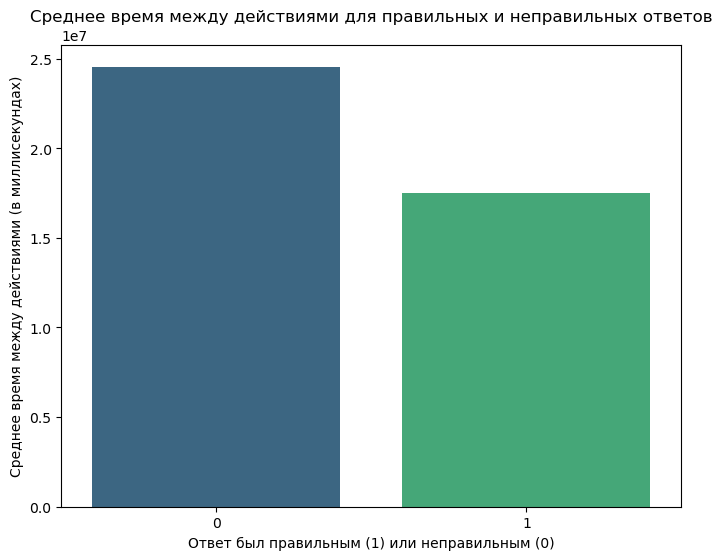

In [32]:
train['time_diff'] = train.groupby('user_id')['timestamp'].diff()
filtered_train = train[train['answered_correctly'].isin([0, 1])]
mean_time_by_correctness = filtered_train.groupby(
    'answered_correctly')['time_diff'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=mean_time_by_correctness.index, 
    y=mean_time_by_correctness.values, 
    palette='viridis'
)
plt.title('Среднее время между действиями для правильных и неправильных ответов')
plt.xlabel('Ответ был правильным (1) или неправильным (0)')
plt.ylabel('Среднее время между действиями (в миллисекундах)')
plt.show()

В среднем такое время выше для неправильных ответов.

Если посчитать среднее по timestamp, то получим среднее время на пользователя, проведенное на платформе с момента регистрации.

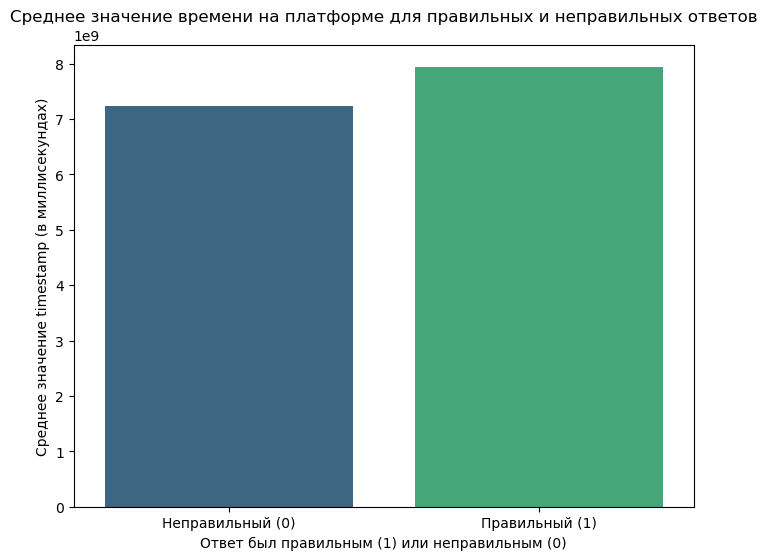

In [33]:
filtered_train = train[train['answered_correctly'].isin([0, 1])]
mean_timestamp_by_correctness = filtered_train.groupby(
    'answered_correctly')['timestamp'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=mean_timestamp_by_correctness.index, 
    y=mean_timestamp_by_correctness.values, 
    palette='viridis'
)
plt.title('Среднее значение времени на платформе для правильных и неправильных ответов')
plt.xlabel('Ответ был правильным (1) или неправильным (0)')
plt.ylabel('Среднее значение timestamp (в миллисекундах)')
plt.xticks(ticks=[0, 1], labels=['Неправильный (0)', 'Правильный (1)'])
plt.show()

Такое время для неправильных ответов наооборт будет несколько меньше. То есть можно предположить, что в среднем пользователи с правильными ответами проводят больше времени на платформе, но времени между вопросами у них уходит меньше.

Поищем зависимость между целевой характеристикой и временем, которое было затрачено на предыдущие ответы. Отрисовать 101 млн. точек не представляется возможным, поэтому отрисую 1% датасета и посмотрю на поведение линии регрессии. (Для того, чтоб убедиться, что выборка в 1% будет репрезентативна, я повторил вычисления с разными значениями параметра random_state.)

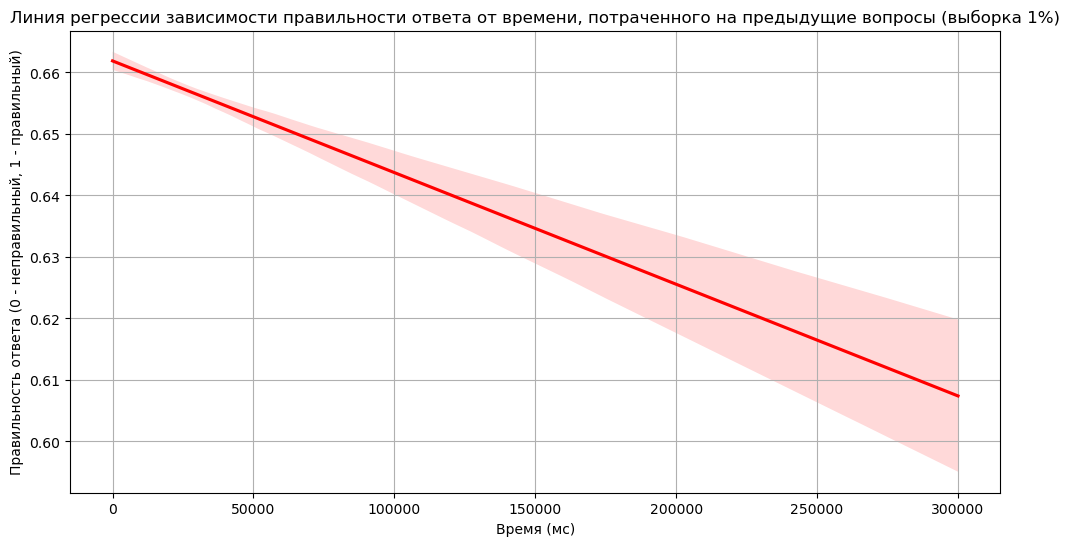

In [8]:
filtered_data = train[['prior_question_elapsed_time', 'answered_correctly']].dropna()
data_sample = filtered_data.sample(frac=0.01, random_state=42)

plt.figure(figsize=(12, 6))
sns.regplot(
    data=data_sample,
    x='prior_question_elapsed_time',
    y='answered_correctly',
    scatter=False,
    color='red'
)
plt.title('Линия регрессии зависимости правильности ответа от времени, ' 
          'потраченного на предыдущие вопросы (выборка 1%)')
plt.xlabel('Время (мс)')
plt.ylabel('Правильность ответа (0 - неправильный, 1 - правильный)')
plt.grid()
plt.show()

По мере роста затраченного времени линия регрессии имеет тенденцию к снижению с 66% до 61%. Посмотрим детальнее зависимость. Для того, чтоб упростить вычисления, разобью временные интервалы на 50 бинов и посчитаю среднее количество правильных ответов для каждого бина.

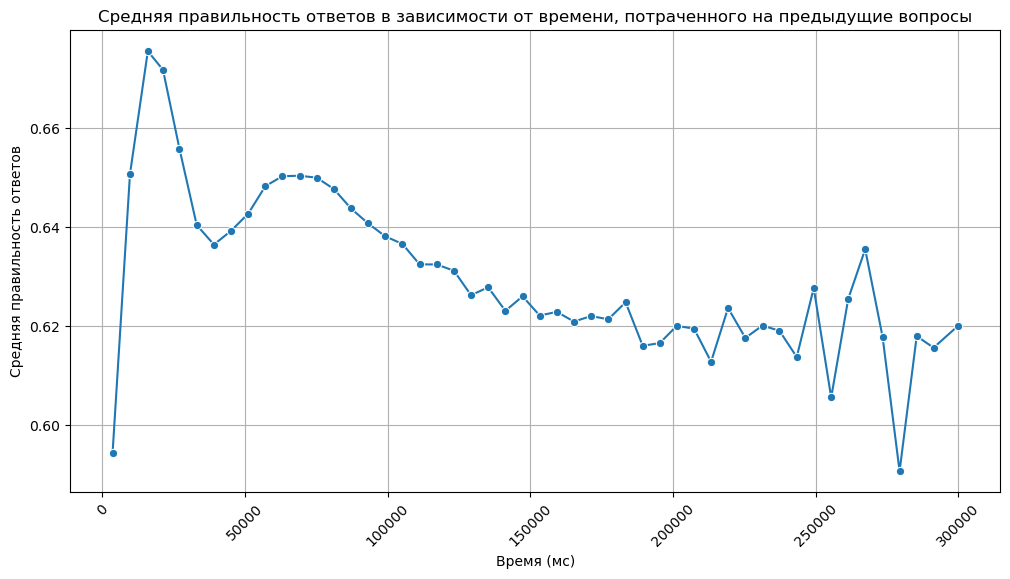

In [9]:
filtered_data['elapsed_time_bins'] = pd.cut(
    filtered_data['prior_question_elapsed_time'], bins=50)

agg_data = filtered_data.groupby('elapsed_time_bins').agg(
    {'prior_question_elapsed_time': 'mean', 
     'answered_correctly': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=agg_data, 
    x='prior_question_elapsed_time', 
    y='answered_correctly', 
    marker='o'
)
plt.xticks(rotation=45)
plt.title('Средняя правильность ответов в зависимости '
          'от времени, потраченного на предыдущие вопросы')
plt.xlabel('Время (мс)')
plt.ylabel('Средняя правильность ответов')
plt.grid()
plt.show()

Средний показатель правильности ответов падает с 68% до 62% по мере роста затраченного времени. В целом это может указывать на то, что растёт сложость вопросов.

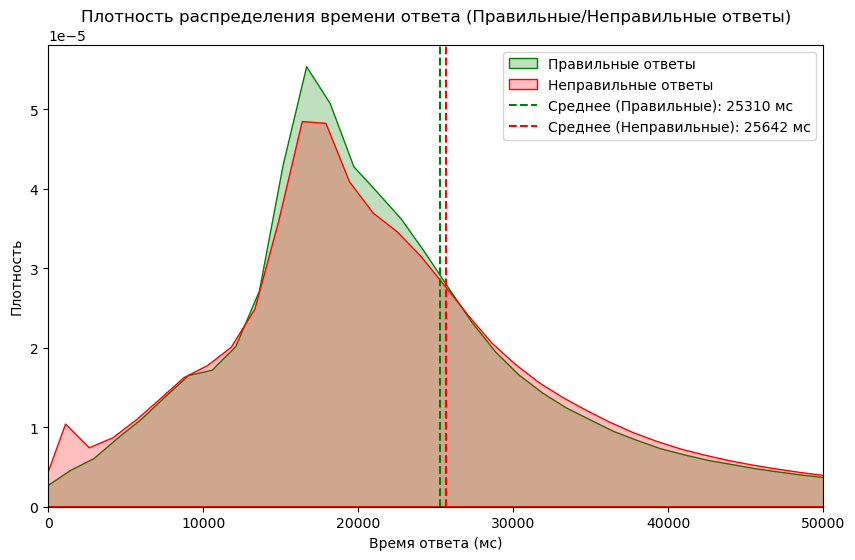

In [22]:
filtered_data = train[train['answered_correctly'].isin([0, 1])]
mean_correct = filtered_data[
    filtered_data['answered_correctly'] == 1]['prior_question_elapsed_time'].mean()
mean_incorrect = filtered_data[
    filtered_data['answered_correctly'] == 0]['prior_question_elapsed_time'].mean()

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=filtered_data[filtered_data['answered_correctly'] == 1], 
    x='prior_question_elapsed_time', 
    label='Правильные ответы', 
    color='green', 
    fill=True
)
sns.kdeplot(
    data=filtered_data[filtered_data['answered_correctly'] == 0], 
    x='prior_question_elapsed_time', 
    label='Неправильные ответы', 
    color='red', 
    fill=True
)
plt.axvline(
    mean_correct, 
    color='green', 
    linestyle='--', 
    label=f'Среднее (Правильные): {mean_correct:.0f} мс'
)
plt.axvline(
    mean_incorrect, 
    color='red', 
    linestyle='--', 
    label=f'Среднее (Неправильные): {mean_incorrect:.0f} мс'
)
plt.title('Плотность распределения времени ответа (Правильные/Неправильные ответы)')
plt.xlabel('Время ответа (мс)')
plt.ylabel('Плотность')
plt.xlim(0, 50000)
plt.legend()
plt.show()

Пик и правильных и неправильных ответов находится на отметке примерно 16к мс. Также всплеск неправильных ответов в самом начале временного интервала.

Далее посмотрю на зависимость от prior_question_had_explanation.

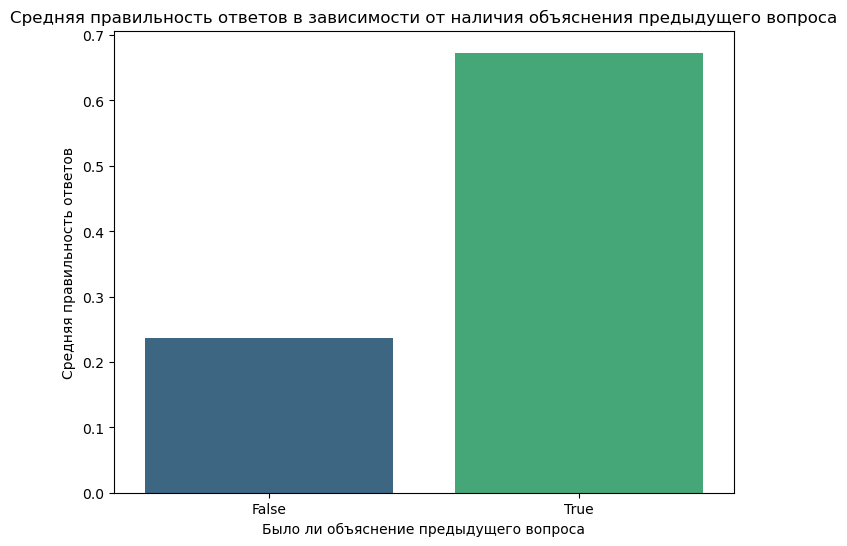

In [59]:
filtered_data = train.dropna(subset=['prior_question_had_explanation'])

agg_data = filtered_data.groupby(
    'prior_question_had_explanation'
)['answered_correctly'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(
    data=agg_data, 
    x='prior_question_had_explanation', 
    y='answered_correctly', 
    palette='viridis'
)
plt.title(
    'Средняя правильность ответов в зависимости '
    'от наличия объяснения предыдущего вопроса'
)
plt.xlabel('Было ли объяснение предыдущего вопроса')
plt.ylabel('Средняя правильность ответов')
plt.show()

Средняя оценка среди тех, кто смотрел разъяснения, существенно выше: 68% против 24%. Оценим корреляцию этих признаков.

In [5]:
train['prior_question_had_explanation'] = train[
    'prior_question_had_explanation'].map({True: 1, False: 0})
filtered_data = train.dropna(subset=[
    'prior_question_had_explanation', 
    'prior_question_elapsed_time'])

correlation_explanation = filtered_data[
    'answered_correctly'].corr(
        filtered_data['prior_question_had_explanation'])
correlation_elapsed_time = filtered_data[
    'answered_correctly'].corr(
        filtered_data['prior_question_elapsed_time'])

print(f'Корреляция между answered_correctly '
      'и prior_question_had_explanation: {correlation_explanation}')
print(f'Корреляция между answered_correctly '
      'и prior_question_elapsed_time: {correlation_elapsed_time}')

Корреляция между answered_correctly и prior_question_had_explanation: 0.10557118327735025
Корреляция между answered_correctly и prior_question_elapsed_time: -0.007900239787032063


Коэффициент корреляции не показывает линейной зависимости целевой переменной от наблюдаемых признаков, из чего можно сделать вывод, что несмотря на то, что на графическом представляении явно видно преимущество тех, кто запрашивал объяснение, линейной зависимости между признаками нет. Следовательно, его нельзя адекватно оценить с помощью простого коэффициента корреляции. Для более точного анализа может потребоваться использование более сложных методов, таких как классификация или анализ множественных факторов. Для того, чтоб продолжить анализ потребуется слияние таблиц. Сперва добавлю таблицу questions.

## Слияние таблиц и анализ метаданных

In [6]:
questions_only = train[train['content_type_id'] == 0]

questions_merged = questions_only.merge(
    questions, 
    how='left', 
    left_on='content_id', 
    right_on='question_id'
)

Контроль размерности после слияния.

In [7]:
train_shape = questions_only.shape
questions_shape = questions.shape
merged_shape = questions_merged.shape

print(f'Размерность train: {train_shape}')
print(f'Размерность questions: {questions_shape}')
print(f'Размерность questions_merged: {merged_shape}')

rows_difference = merged_shape[0] - train_shape[0]
print(f'Изменение количества строк после слияния: {rows_difference}')


Размерность train: (99271300, 9)
Размерность questions: (13523, 5)
Размерность questions_merged: (99271300, 14)
Изменение количества строк после слияния: 0


Из questions можно взять информацию о группах вопросов, которые вызвали наибольшее затруднение у студентов. 

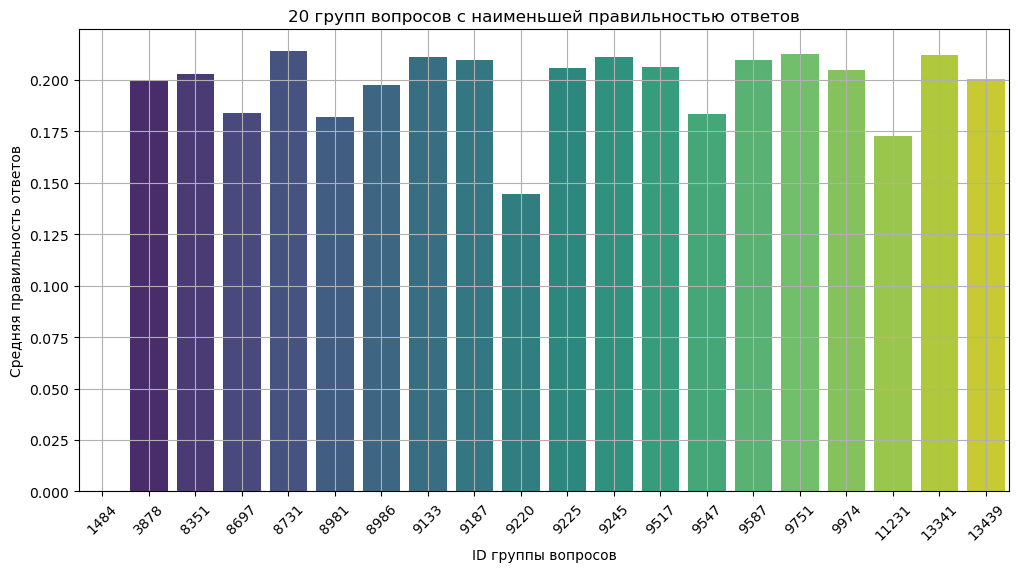

In [8]:
filtered_data = questions_merged[
    questions_merged['answered_correctly'].isin([0, 1])]
bundle = filtered_data.groupby(
    'bundle_id')['answered_correctly'].mean().reset_index()
bundle = bundle.sort_values(by='answered_correctly')
lowest_bundle = bundle.nsmallest(20, 'answered_correctly')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=lowest_bundle, 
    x='bundle_id', 
    y='answered_correctly', 
    palette='viridis'
)
plt.title('20 групп вопросов с наименьшей правильностью ответов')
plt.xlabel('ID группы вопросов')
plt.ylabel('Средняя правильность ответов')
plt.xticks(rotation=45) 
plt.grid()
plt.show()


Бросается в глаза группа 1484, в которой правильных ответов ровно 0.

In [9]:
questions_merged.query('bundle_id == 1484')

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
15716336,2677057424,343784114,1485,0,5348,2,0,1333.0,True,1485,1484,0,3,136 38 29
15716337,2677057424,343784114,1486,0,5348,1,0,1333.0,True,1486,1484,3,3,82 38 29
15716338,2677057424,343784114,1484,0,5348,0,0,1333.0,True,1484,1484,2,3,74 38 29


Выглядит словно только единственный id студента добрался до этой группы. Либо как ошибка. Далее перехожу к таблице lectures. Для начала посмотрим на уникальные значения.

In [11]:
get_uniques(lectures)

,Столбцы,Уникальные значения,Тип данных
0,lecture_id,"[89, 100, 185, 192, 317, 335, 484, 641, 761, 8...",int64
1,tag,"[159, 70, 45, 79, 156, 114, 179, 134, 93, 80, ...",int64
2,part,"[5, 1, 6, 2, 7, 3, 4]",int64
3,type_of,"[concept, solving question, intention, starter]",object


Итого имеем 4 типа лекций:
1. **Concept** — объясняющие теорию.    
2. **Solving question** — объясняющие решение задач.
3. **Intention** — описывающие цель или замысел обучения.
4. **Starter** — вводные уроки.

Было бы интересно оценить, как влияет посещение тех или иных типов лекций на результат студента. Сперва поделю студентов на 2 группы: посетивших лекции и не посетивших ни одной, и посмотрю на их средний балл.

,Группа,Средний балл
0,Посетили лекции,0.632370
1,Не посещали лекции,0.574096


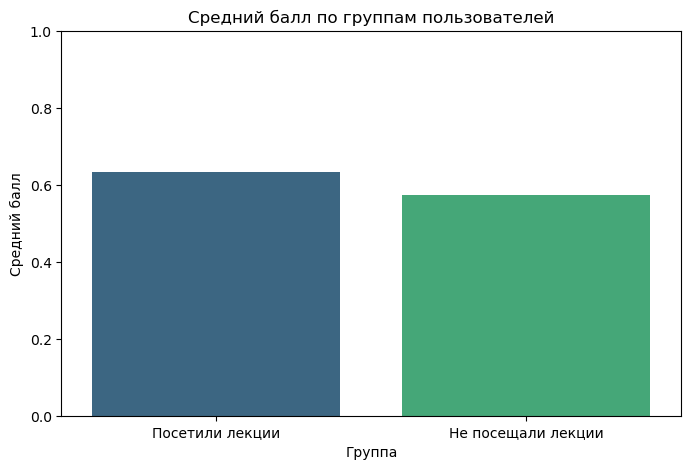

In [37]:
all_users = train['user_id'].unique()
attended_users = train[train['content_type_id'] == 1]['user_id'].unique()
never_attended_users = set(all_users) - set(attended_users)
attended_df = train[train['user_id'].isin(attended_users)]
never_attended_df = train[train['user_id'].isin(never_attended_users)]

mean_scores = {
    'Посетили лекции': attended_df['answered_correctly'].mean(),
    'Не посещали лекции': never_attended_df['answered_correctly'].mean()
}
mean_scores_df = pd.DataFrame(list(mean_scores.items()), columns=['Группа', 'Средний балл'])

plt.figure(figsize=(8, 5))
sns.barplot(data=mean_scores_df, x='Группа', y='Средний балл', palette='viridis')
plt.title('Средний балл по группам пользователей')
plt.ylabel('Средний балл')
plt.xlabel('Группа')
plt.ylim(0, 1) 

display(mean_scores_df)
plt.show()

Получаем, что успеваемость студентов, которые посещали лекции, в среднем примерно на 6% выше.

In [6]:
lectures_merged = train.merge(
    lectures[['lecture_id', 'type_of']],
    left_on='content_id',
    right_on='lecture_id',
    how='left'
)

In [8]:
filtered_train = train[train['answered_correctly'].isin([0, 1])]
attended_lectures = lectures_merged[lectures_merged['content_type_id'] == 1]

def categorize_user(user_id):
    user_data = attended_lectures[attended_lectures['user_id'] == user_id]
    types_attended = set(user_data['type_of'].unique())
    
    if not types_attended:
        return 'Не посещал'
    elif len(types_attended) == 5:
        return 'Посетил несколько видов'
    elif 'concept' in types_attended and len(types_attended) == 1:
        return 'Посетил только Сoncept'
    elif 'solving question' in types_attended and len(types_attended) == 1:
        return 'Посетил только Solving Question'
    elif 'intention' in types_attended and len(types_attended) == 1:
        return 'Посетил только Intention'
    elif 'starter' in types_attended and len(types_attended) == 1:
        return 'Посетил только Starter'
    else:
        return 'Посетил несколько видов'
    
user_categories = {user: categorize_user(user) for user in train['user_id'].unique()}

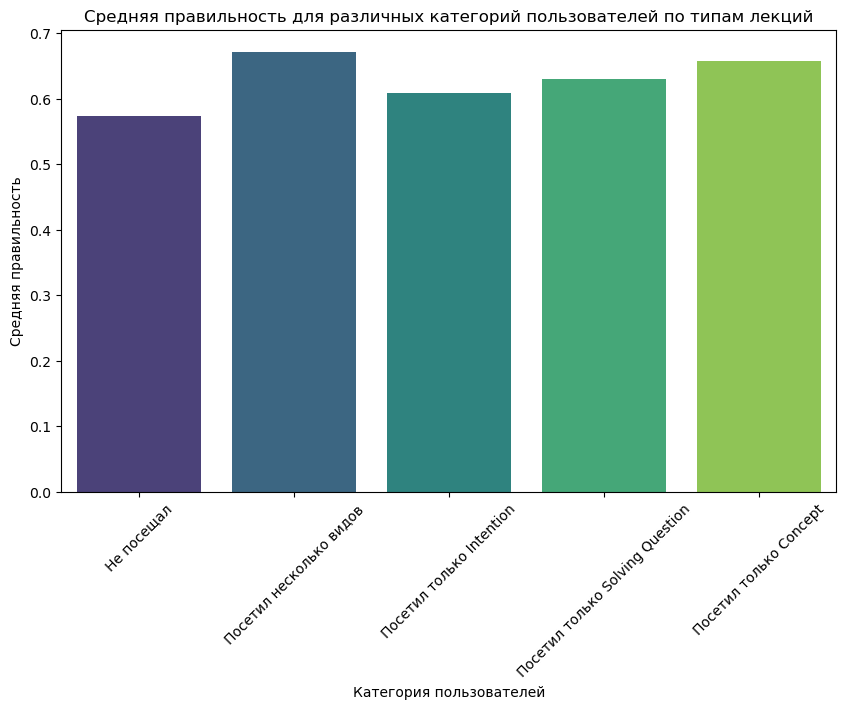

In [9]:
user_categories_df = pd.DataFrame(
    user_categories.items(), 
    columns=['user_id', 'category']
)
merged_with_answers = user_categories_df.merge(
    filtered_train[['user_id', 'answered_correctly']], on='user_id'
)
mean_correctness = merged_with_answers.groupby(
    'category')['answered_correctly'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_correctness, 
    x='category', 
    y='answered_correctly', 
    palette='viridis')
plt.title('Средняя правильность для различных категорий '
          'пользователей по типам лекций')
plt.xlabel('Категория пользователей')
plt.ylabel('Средняя правильность')
plt.xticks(rotation=45)
plt.show()

В целом вся разница влияния на результат находится в пределах 10%. 

## Когортный анализ

In [45]:
train['user_id'].nunique()

393656

Всего в датасете 393656 уникальных ID. Сделаю три выборки по 1000 человек с наибольшим количеством правильных ответов и с наименьшим, а также 1000 из середины и посмотрю на их поведение.

In [10]:
user_correct_counts = (
    train[train['answered_correctly'].isin([0, 1])]
    .groupby('user_id')['answered_correctly']
    .sum()
)
user_correct_counts_df = user_correct_counts.reset_index()
user_correct_counts_df.columns = ['user_id', 'correct_answers']
sorted_users = user_correct_counts_df.sort_values(
    by='correct_answers', ascending=True)

mid_start_index = len(sorted_users) // 2 - 500  
mid_end_index = len(sorted_users) // 2 + 500  

top_users = sorted_users.tail(1000)['user_id'] 
middle_users = sorted_users.iloc[
    mid_start_index:mid_end_index]['user_id']
bottom_users = sorted_users.head(1000)['user_id']

В целом такое прямое деление по абсолютному показателю не идеально и не учитывает относительную производительность студента.

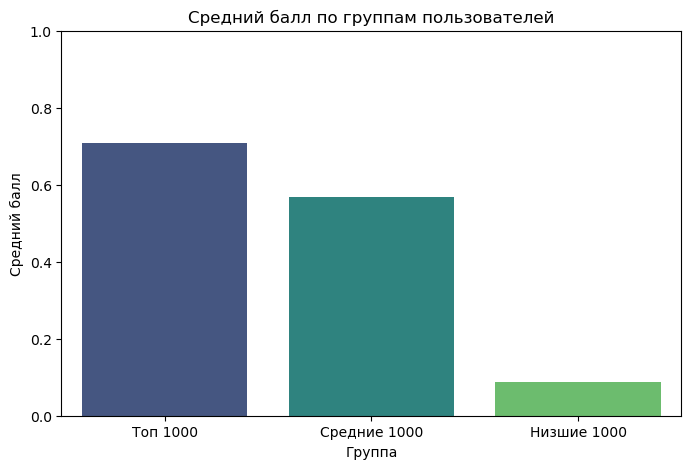

,Группа,Средний балл
0,Топ 1000,0.709417
1,Средние 1000,0.567612
2,Низшие 1000,0.087034


In [58]:
top_mean_score = train[train['user_id']
                .isin(top_users)]['answered_correctly'].mean()
mid_mean_score = train[train['user_id']
                .isin(middle_users)]['answered_correctly'].mean()
bottom_mean_score = train[train['user_id']
                .isin(bottom_users)]['answered_correctly'].mean()

mean_scores_df = pd.DataFrame({
    'Группа': ['Топ 1000', 'Средние 1000', 'Низшие 1000'],
    'Средний балл': [top_mean_score, mid_mean_score, bottom_mean_score]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=mean_scores_df, x='Группа', y='Средний балл', palette='viridis')
plt.title('Средний балл по группам пользователей')
plt.ylabel('Средний балл')
plt.xlabel('Группа')
plt.ylim(0, 1)
plt.show()

display(mean_scores_df)

Но если посмотреть на относительный показатель, то в данном случае он тоже будет примерно соответствовать логике исследования.

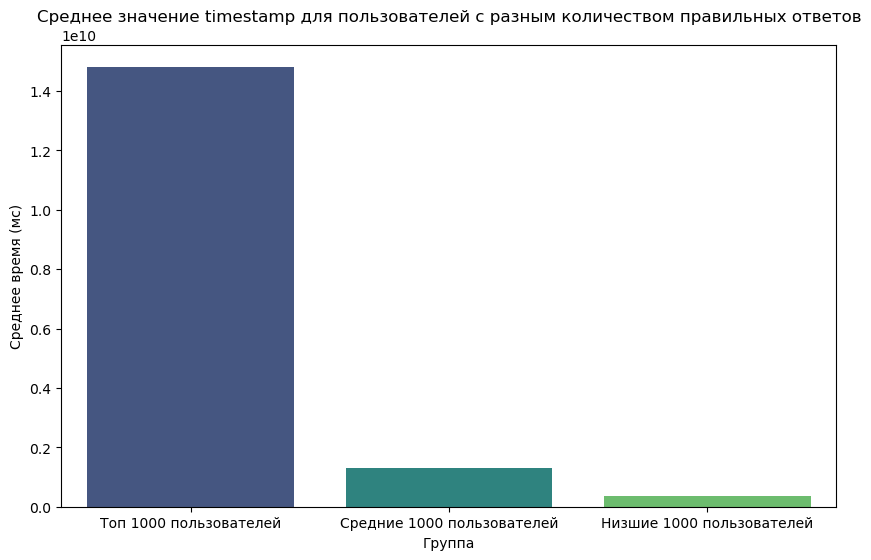

In [26]:
mean_top_timestamp = train[train['user_id']
                    .isin(top_users)]['timestamp'].mean()
mean_middle_timestamp = train[train['user_id']
                    .isin(middle_users)]['timestamp'].mean()
mean_bottom_timestamp = train[train['user_id']
                    .isin(bottom_users)]['timestamp'].mean()

mean_timestamps_df = pd.DataFrame({
    'Группа': [
        'Топ 1000 пользователей', 
        'Средние 1000 пользователей', 
        'Низшие 1000 пользователей'
    ],
    'Среднее время (мс)': [
        mean_top_timestamp, 
        mean_middle_timestamp, 
        mean_bottom_timestamp
    ]
})

plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_timestamps_df, 
    x='Группа', 
    y='Среднее время (мс)', 
    palette='viridis'
)
plt.title('Среднее значение timestamp для пользователей '
          'с разным количеством правильных ответов')
plt.ylabel('Среднее время (мс)')
plt.xlabel('Группа')
plt.show()

Среднее время, которое топ-1000 студентов проводят на платформе, значительно выше. Посмотрим то же по time_diff.

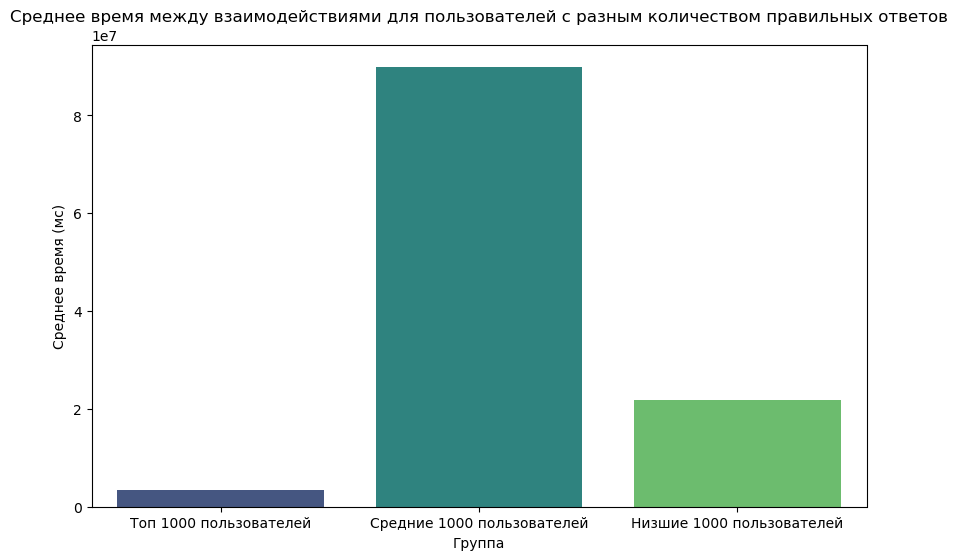

In [28]:
train['time_diff'] = train.groupby('user_id')['timestamp'].diff()
filtered_train = train[train['answered_correctly'].isin([0, 1])]

mean_top_time_diff = train[
    train['user_id'].isin(top_users)]['time_diff'].mean()
mean_middle_time_diff = train[
    train['user_id'].isin(middle_users)]['time_diff'].mean()
mean_bottom_time_diff = train[
    train['user_id'].isin(bottom_users)]['time_diff'].mean()

mean_time_diff_df = pd.DataFrame({
    'Группа': [
        'Топ 1000 пользователей', 
        'Средние 1000 пользователей', 
        'Низшие 1000 пользователей'
    ],
    'Среднее время (мс)': [
        mean_top_time_diff, 
        mean_middle_time_diff, 
        mean_bottom_time_diff
    ]
})

plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_time_diff_df, 
    x='Группа', 
    y='Среднее время (мс)', 
    palette='viridis'
)
plt.title('Среднее время между взаимодействиями '
          'для пользователей с разным количеством правильных ответов')
plt.ylabel('Среднее время (мс)')
plt.xlabel('Группа')
plt.show()

Не могу удержаться, чтоб не вставить картинку.

![Среднеум](https://ru.meming.world/images/ru/c/c8/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D1%83%D0%BC_%D1%88%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD.jpeg)


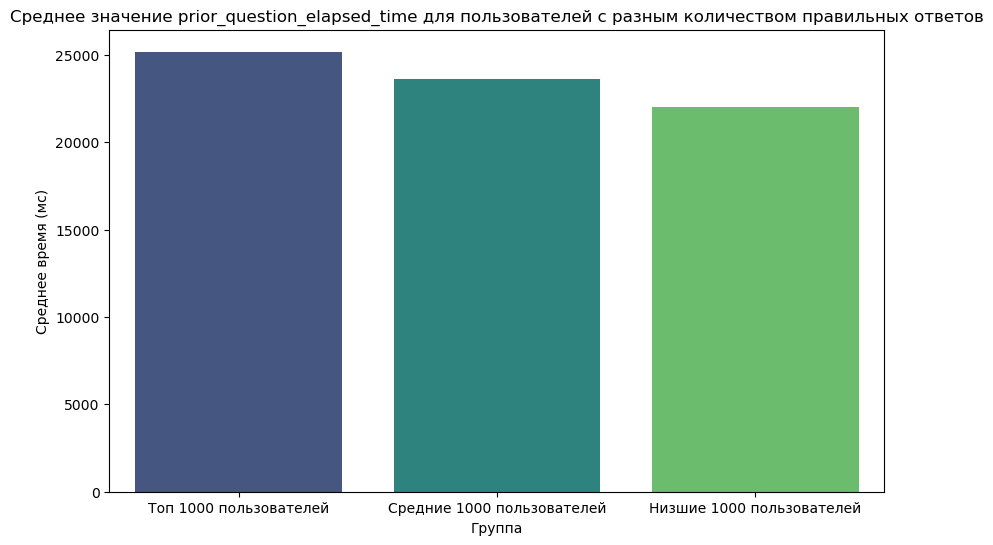

In [22]:
mean_top_elapsed_time = train[
    train['user_id'].isin(top_users)]['prior_question_elapsed_time'].mean()
mean_middle_elapsed_time = train[
    train['user_id'].isin(middle_users)]['prior_question_elapsed_time'].mean()
mean_bottom_elapsed_time = train[
    train['user_id'].isin(bottom_users)]['prior_question_elapsed_time'].mean()

mean_elapsed_time_df = pd.DataFrame({
    'Группа': [
        'Топ 1000 пользователей', 
        'Средние 1000 пользователей', 
        'Низшие 1000 пользователей'
    ],
    'Среднее время (мс)': [
        mean_top_elapsed_time, 
        mean_middle_elapsed_time, 
        mean_bottom_elapsed_time
    ]
})

plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_elapsed_time_df, 
    x='Группа', 
    y='Среднее время (мс)', 
    palette='viridis'
)
plt.title('Среднее значение prior_question_elapsed_time ' 
          'для пользователей с разным количеством правильных ответов')
plt.ylabel('Среднее время (мс)')
plt.xlabel('Группа')
plt.show()

При этом значения prior_question_elapsed_time для всех трёх групп примерно равны и у топов даже несколько выше. Получается, что у топов уходит чуть больше времени на обдумывание ответа, но при этом у них существенно меньше интервалы между действиями. Это может говорить о разном поведении пользователей. Вероятно, пользователи из середины делают длительные перерывы между вопросами, которые уходят на обдумывание и подготовку.

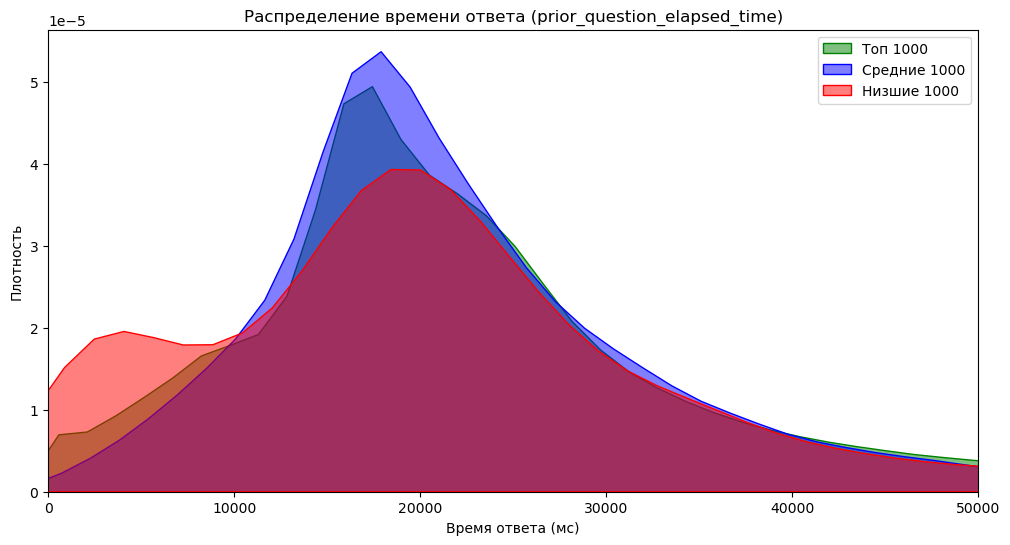

In [51]:
top_data = train[train['user_id'].isin(top_users)]
middle_data = train[train['user_id'].isin(middle_users)]
bottom_data = train[train['user_id'].isin(bottom_users)]

plt.figure(figsize=(12, 6))
sns.kdeplot(
    top_data['prior_question_elapsed_time'], 
    label='Топ 1000', 
    color='green', 
    fill=True, 
    alpha=0.5
)
sns.kdeplot(
    middle_data['prior_question_elapsed_time'], 
    label='Средние 1000', 
    color='blue', 
    fill=True, 
    alpha=0.5
)
sns.kdeplot(
    bottom_data['prior_question_elapsed_time'], 
    label='Низшие 1000', 
    color='red', 
    fill=True, 
    alpha=0.5
)
plt.title('Распределение времени ответа (prior_question_elapsed_time)')
plt.xlabel('Время ответа (мс)')
plt.ylabel('Плотность')
plt.legend()
plt.xlim(0, 50000)
plt.show()

Видим, что низшие-1000 часто дают необдуманный ответ, который оказывается неверным.

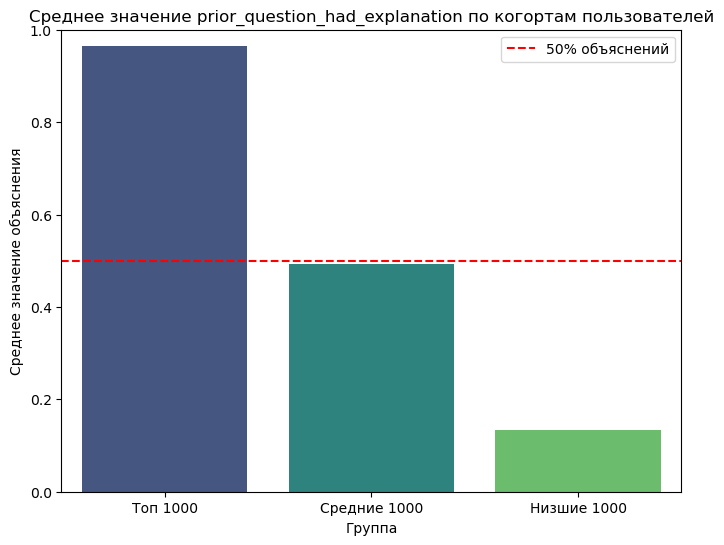

In [50]:
mean_explanation_top = train[
    train['user_id'].isin(top_users)]['prior_question_had_explanation'].mean()
mean_explanation_middle = train[
    train['user_id'].isin(middle_users)]['prior_question_had_explanation'].mean()
mean_explanation_bottom = train[
    train['user_id'].isin(bottom_users)]['prior_question_had_explanation'].mean()

mean_explanations_df = pd.DataFrame({
    'Группа': ['Топ 1000', 'Средние 1000', 'Низшие 1000'],
    'Среднее объяснение (1=да, 0=нет)': [
        mean_explanation_top, 
        mean_explanation_middle, 
        mean_explanation_bottom
    ]
})

plt.figure(figsize=(8, 6))
sns.barplot(
    data=mean_explanations_df, 
    x='Группа', 
    y='Среднее объяснение (1=да, 0=нет)', 
    palette='viridis'
)
plt.title('Среднее значение prior_question_had_explanation ' 
          'по когортам пользователей')
plt.ylabel('Среднее значение объяснения')
plt.xlabel('Группа')
plt.ylim(0, 1)  
plt.axhline(y=0.5, color='red', linestyle='--', label='50% объяснений')
plt.legend()
plt.show()

Топ-1000 смотрят объяснения почти всегда, середнячки - почти в 50% случаев, просмотр объяснений низшими-1000 около 15%.

,Группа,Количество лекций
0,Топ 1000,115919
1,Средние 1000,287
2,Низшие 1000,19


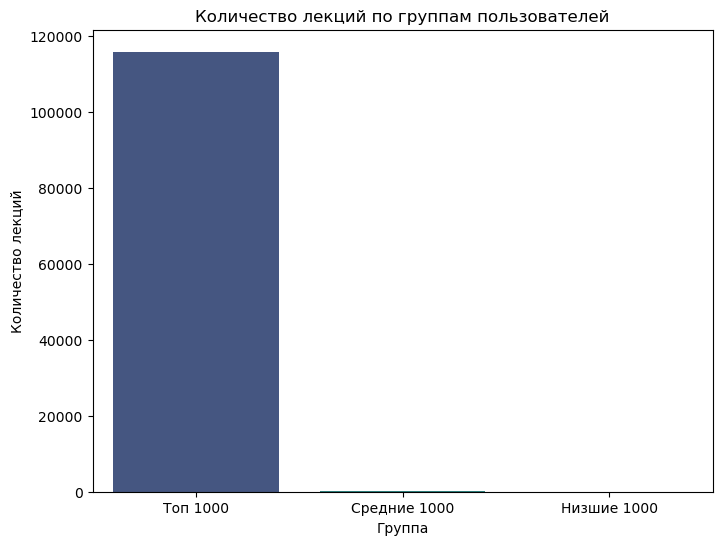

In [56]:
lecture_data = train[train['content_type_id'] == 1]

lecture_counts = {
    'Топ 1000': 0,
    'Средние 1000': 0,
    'Низшие 1000': 0
}
lecture_counts['Топ 1000'] = lecture_data[
    lecture_data['user_id'].isin(top_users)].shape[0]
lecture_counts['Средние 1000'] = lecture_data[
    lecture_data['user_id'].isin(middle_users)].shape[0]
lecture_counts['Низшие 1000'] = lecture_data[
    lecture_data['user_id'].isin(bottom_users)].shape[0]
lecture_counts_df = pd.DataFrame(list(
    lecture_counts.items()), columns=['Группа', 'Количество лекций'])

plt.figure(figsize=(8, 6))
sns.barplot(
    data=lecture_counts_df, 
    x='Группа', 
    y='Количество лекций', 
    palette='viridis'
)
plt.title('Количество лекций по группам пользователей')
plt.ylabel('Количество лекций')
plt.xlabel('Группа') 

display(lecture_counts_df)
plt.show()

Почти никто, кроме топ-1000, не посещает лекции, что должно коррелировать со временем, проводимым на платформе.

,category,cohort,count
0,Не посещал,top_users,18
1,Посетил все лекции,top_users,0
2,Посетил только Сoncept,top_users,34
3,Посетил только Solving Question,top_users,1
4,Посетил только Intention,top_users,0
5,Посетил только Starter,top_users,0
6,Посетил несколько видов,top_users,947
7,Не посещал,middle_users,799
8,Посетил все лекции,middle_users,0
9,Посетил только Сoncept,middle_users,147


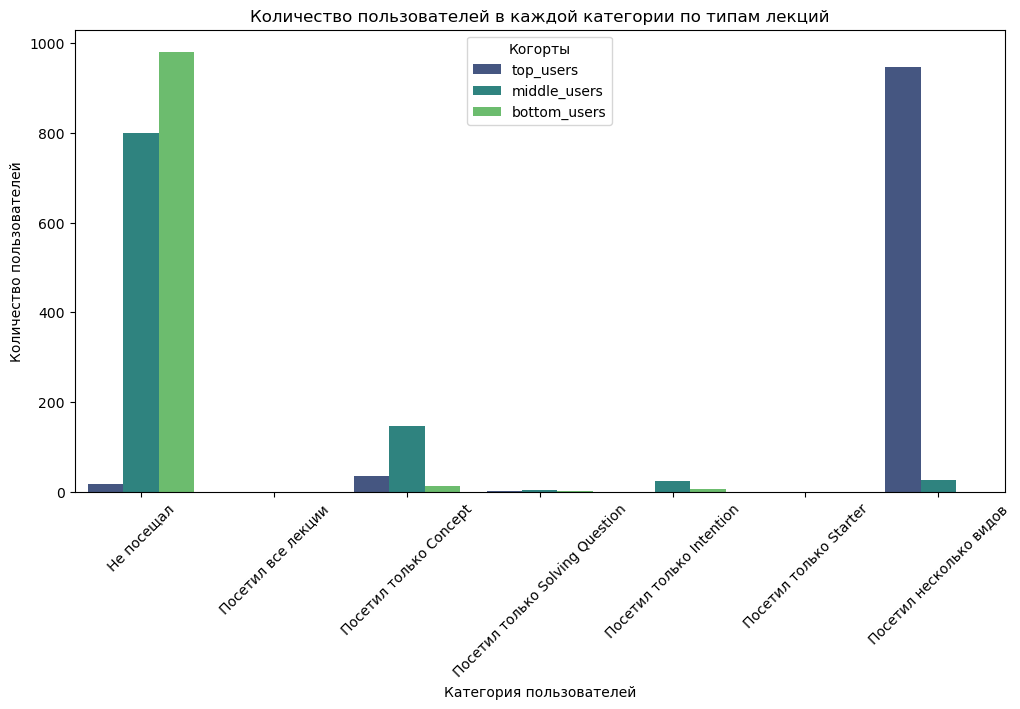

In [17]:
categories = ['Не посещал', 'Посетил все лекции', 'Посетил только Сoncept',
              'Посетил только Solving Question', 'Посетил только Intention', 
              'Посетил только Starter', 'Посетил несколько видов']

top_users_counts = {category: 0 for category in categories}
middle_users_counts = {category: 0 for category in categories}
bottom_users_counts = {category: 0 for category in categories}

for user in top_users:
    category = user_categories_df.loc[
        user_categories_df['user_id'] == user, 'category'].values[0]
    top_users_counts[category] += 1

for user in middle_users:
    category = user_categories_df.loc[
        user_categories_df['user_id'] == user, 'category'].values[0]
    middle_users_counts[category] += 1

for user in bottom_users:
    category = user_categories_df.loc[
        user_categories_df['user_id'] == user, 'category'].values[0]
    bottom_users_counts[category] += 1

counts_df = pd.DataFrame({
    'category': categories,
    'top_users': [top_users_counts[cat] for cat in categories],
    'middle_users': [middle_users_counts[cat] for cat in categories],
    'bottom_users': [bottom_users_counts[cat] for cat in categories]
})
counts_df = counts_df.melt(
    id_vars='category', 
    var_name='cohort', 
    value_name='count'
)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=counts_df, 
    x='category', 
    y='count', 
    hue='cohort', 
    palette='viridis'
)
plt.title('Количество пользователей в каждой категории по типам лекций')
plt.xlabel('Категория пользователей')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.legend(title='Когорты', loc='upper center')

display(counts_df)
plt.show()


Посещение каких-то определённых типов лекций среди когорт не практикуется. Топы обычно посещают всё, остальные не посещают ничего.

## Общий вывод

В ходе работы были проанализированы следующие признаки: 
- **answered_correctly**: распределение правильных/неправильных ответов - 65,7% на 34,3%  
- **timestamp**: студенты с высокой успеваемостью проводят существенно больше времени на платформе, посещая лекции, при этом временные промежутки между действиями у них значительно ниже, чем у студентов со средней успеваемостью.
- **prior_question_elapsed_time**: среднее время, которое уходит на обдумывание ответов, приблизительно равно у всех студентов. При этом у студентов с высокой успеваемостью оно несколько выше, что, вероятно, связано с тем, что эти студенты доходят до более сложных вопросов. Средний показатель правильности ответов снижается по мере увеличения времени обдумывания.
- **content_type_id**: студенты, посещающие лекции, имеют более высокую успеваемость.
- **prior_question_had_explanation**: студенты, просматривающие объяснения, имеют более высокую успеваемость.
- **bundle_id**: были выделены группы вопросов, вызывающие наибольшие затруднения у студентов. 
- **type_of**: выделить какие-то конкретные типы лекций не удалось, наибольшая успеваемость присуща студентам, посещающим все типы лекций.